In [1]:
# imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [2]:
# inputs
test_data = open('input-test.txt').read()
data = open('input.txt').read()

# Part 1

In [7]:
# test
content = test_data

def parse_input(content):
    coords = np.array(re.findall(r'([0-9]+),([0-9]+)\n', content), dtype=int)
    coords = np.fliplr(coords)  # numpy has x and y flipped
    instructions = [(axis, int(value)) for axis, value in re.findall(r'.*\s([xy])=([0-9]+)', content)]

    matrix = np.zeros((max(coords[:, 0])+1, max(coords[:, 1])+1))
    dots_mask = tuple(np.transpose(coords))
    matrix[dots_mask] = 1
    matrix = matrix.astype(int)

    return matrix, instructions


def pad_to_symmetry(matrix, axis, value):
    if axis == 'x':
        dim = matrix.shape[1]
        pad_amount = abs(int(dim-2*value-1))
        pad_x = (pad_amount, 0) if value < int(dim/2) else (0, pad_amount)
        matrix = np.pad(matrix, ((0, 0), pad_x), mode='constant', constant_values = 0)
    else:
        dim = matrix.shape[0]
        pad_amount = abs(int(dim-2*value-1))
        pad_y = (pad_amount, 0) if value < int(dim/2) else (0, pad_amount)
        matrix = np.pad(matrix, (pad_y, (0, 0)), mode='constant', constant_values = 0)
    
    return matrix


def fold_matrix(content, n_folds=None):
    matrix, instructions = parse_input(content)

    if n_folds is not None:
        instructions = instructions[:n_folds]
    
    for axis, value in instructions:
        matrix = pad_to_symmetry(matrix, axis, value)
        if axis == 'x':
            a, b = matrix[:, :value], matrix[:, value+1:]
            b = np.fliplr(b)
        elif axis == 'y':
            a, b = matrix[:value], matrix[value+1:]
            b = np.flipud(b)

        matrix = np.logical_or(np.equal(a, 1), np.equal(b, 1)).astype(int)

    return matrix

assert np.count_nonzero(fold_matrix(content, 1)) == 17

In [8]:
# real
content = data
np.count_nonzero(fold_matrix(content, 1))

666

# Part 2

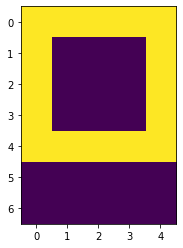

In [9]:
# test
content = test_data
output = fold_matrix(content)
plt.imshow(output, vmin=0, vmax=1)

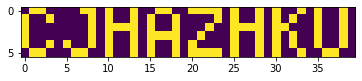

In [10]:
# real
content = data
output = fold_matrix(content)
plt.imshow(output, vmin=0, vmax=1)